# Mateusz

HeavyMetals_Concentration	Terraforming_Initiatives	Liquid_Energy_Consumption_Terawatts	Alien_Population_Count	CO2_Concentration	Dominant_Species_Social_Structure	Hydrogen_Concentration	Colonization_Year	Species_Expansion_Response	Alien_Civilization_Level	Interplanetary_Communications

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import norm
import scipy.stats as stats
import datetime as dt
from scipy.stats import lognorm

In [3]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


In [4]:
# List of target columns
target_columns = [
    'HeavyMetals_Concentration', 'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts',
    'Alien_Population_Count', 'CO2_Concentration', 'Dominant_Species_Social_Structure',
    'Hydrogen_Concentration', 'Colonization_Year', 'Species_Expansion_Response',
    'Alien_Civilization_Level', 'Interplanetary_Communications'
]

# Selecting the target columns from the DataFrame
df_selected = df[target_columns]

In [5]:
# Check data types and non-null counts
df_selected.info()

# Get summary statistics
df_selected.describe(include='all')

# View the first few rows
#df_selected.head()

# Check for missing values
df_selected.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HeavyMetals_Concentration            2030 non-null   float64
 1   Terraforming_Initiatives             2010 non-null   float64
 2   Liquid_Energy_Consumption_Terawatts  1992 non-null   float64
 3   Alien_Population_Count               1999 non-null   float64
 4   CO2_Concentration                    2048 non-null   float64
 5   Dominant_Species_Social_Structure    2007 non-null   object 
 6   Hydrogen_Concentration               2009 non-null   float64
 7   Colonization_Year                    1980 non-null   float64
 8   Species_Expansion_Response           2038 non-null   float64
 9   Alien_Civilization_Level             2018 non-null   object 
 10  Interplanetary_Communications        2016 non-null   float64
dtypes: float64(9), object(2)
memor

HeavyMetals_Concentration              210
Terraforming_Initiatives               230
Liquid_Energy_Consumption_Terawatts    248
Alien_Population_Count                 241
CO2_Concentration                      192
Dominant_Species_Social_Structure      233
Hydrogen_Concentration                 231
Colonization_Year                      260
Species_Expansion_Response             202
Alien_Civilization_Level               222
Interplanetary_Communications          224
dtype: int64

HeavyMetals_Concentration              210
Terraforming_Initiatives               230
Liquid_Energy_Consumption_Terawatts    248
Alien_Population_Count                 241
CO2_Concentration                      192
Dominant_Species_Social_Structure      233
Hydrogen_Concentration                 231
Colonization_Year                      260
Species_Expansion_Response             202
Alien_Civilization_Level               222
Interplanetary_Communications          224
dtype: int64


<Figure size 1200x600 with 0 Axes>

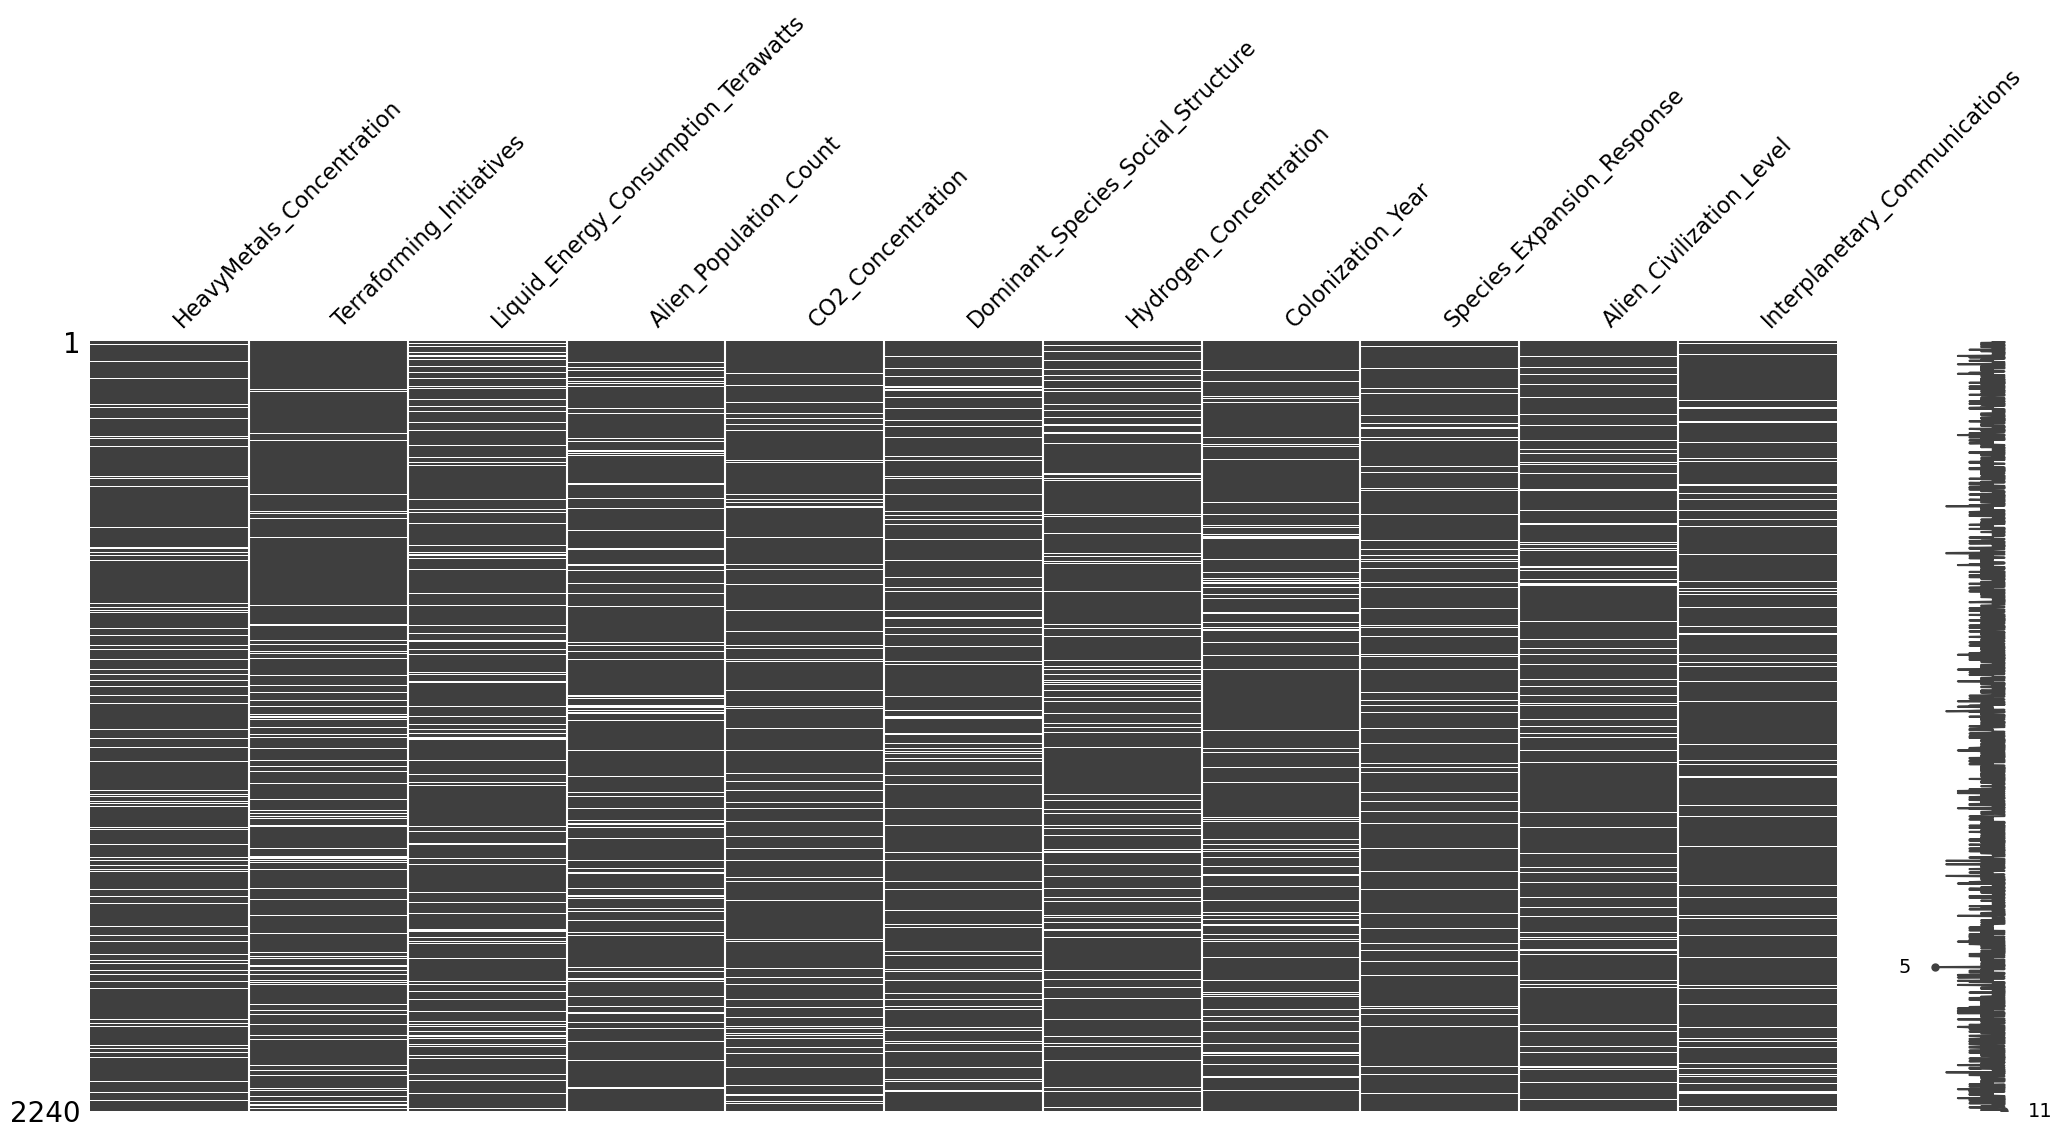

In [6]:
print(df_selected.isnull().sum())
plt.figure(figsize=(12, 6))
msno.matrix(df_selected)
plt.show()


In [7]:
#Make a copy of the dataframe, as such we can always go back easily
df_in_progress = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [8]:
# Function to quickly plot the demanded variables

def perform_graphical_analysis(plots_per_row, columns):

    for i in range(0, len(columns), plots_per_row):
        remaining_columns = len(columns) - i
        
        if remaining_columns == 2:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        elif remaining_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        else:
            fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
        
        for j, column in enumerate(columns[i:i+plots_per_row]):
            if remaining_columns == 1:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=ax)
                    ax.set_title(f'Count plot of {column} (binary)')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=ax)
                    ax.set_title(f'Distribution of {column}')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Frequency')
            else:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=axes[j])
                    axes[j].set_title(f'Count plot of {column} (binary)')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=axes[j])
                    axes[j].set_title(f'Distribution of {column}')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

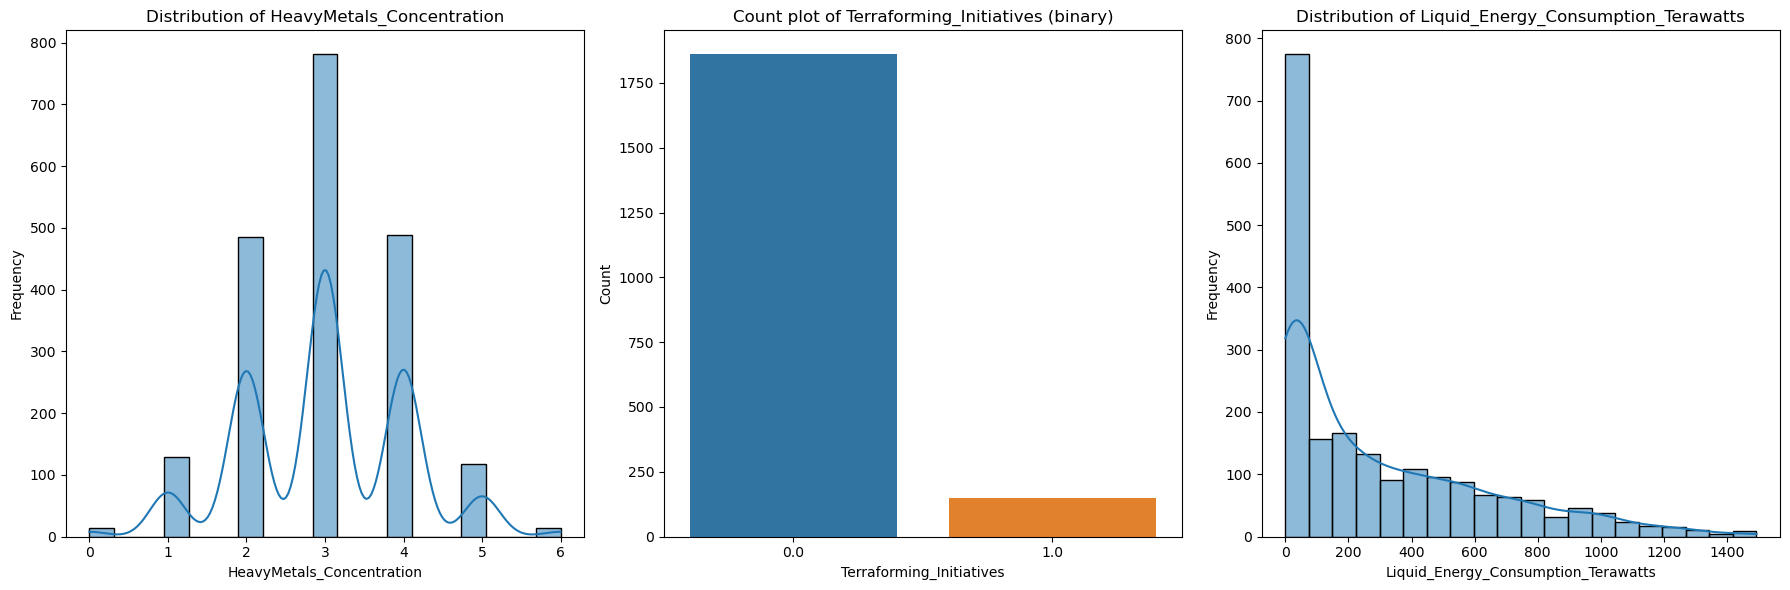

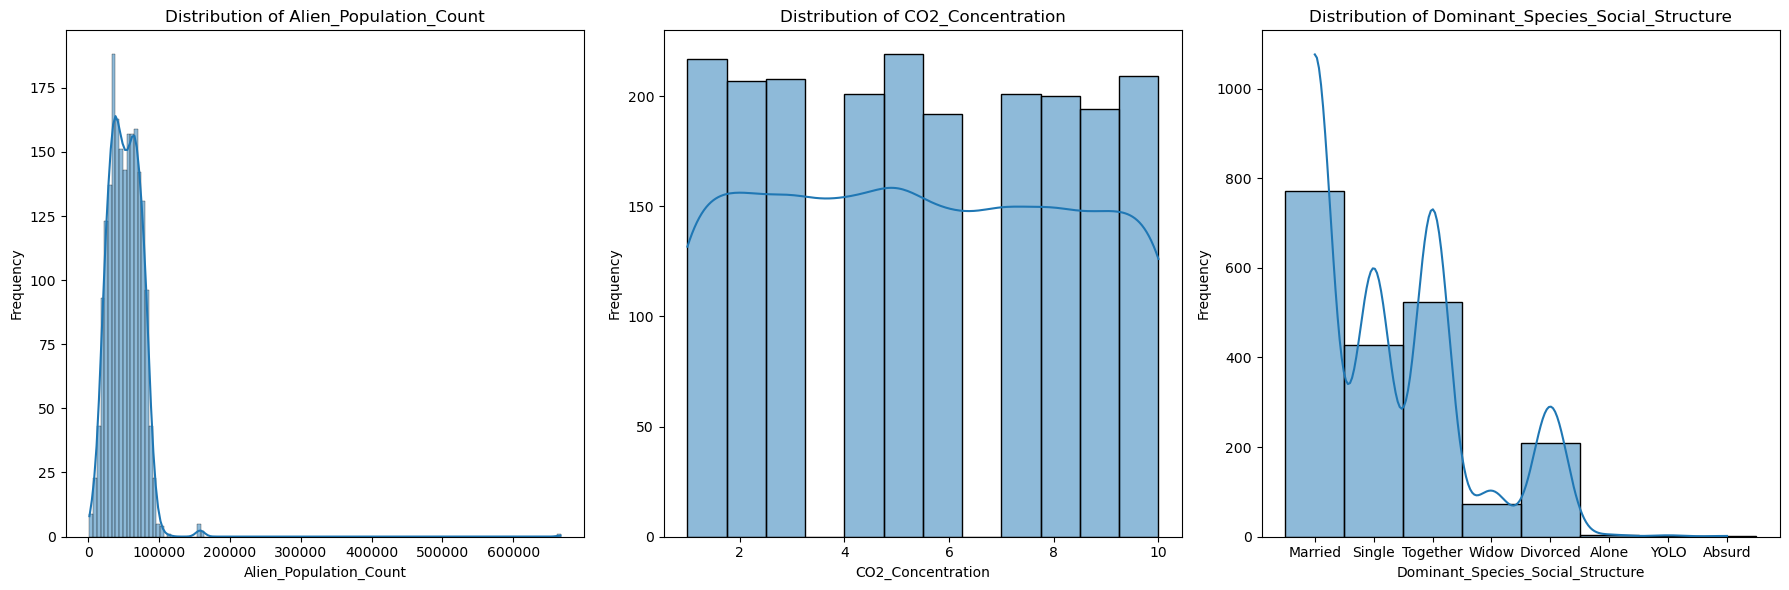

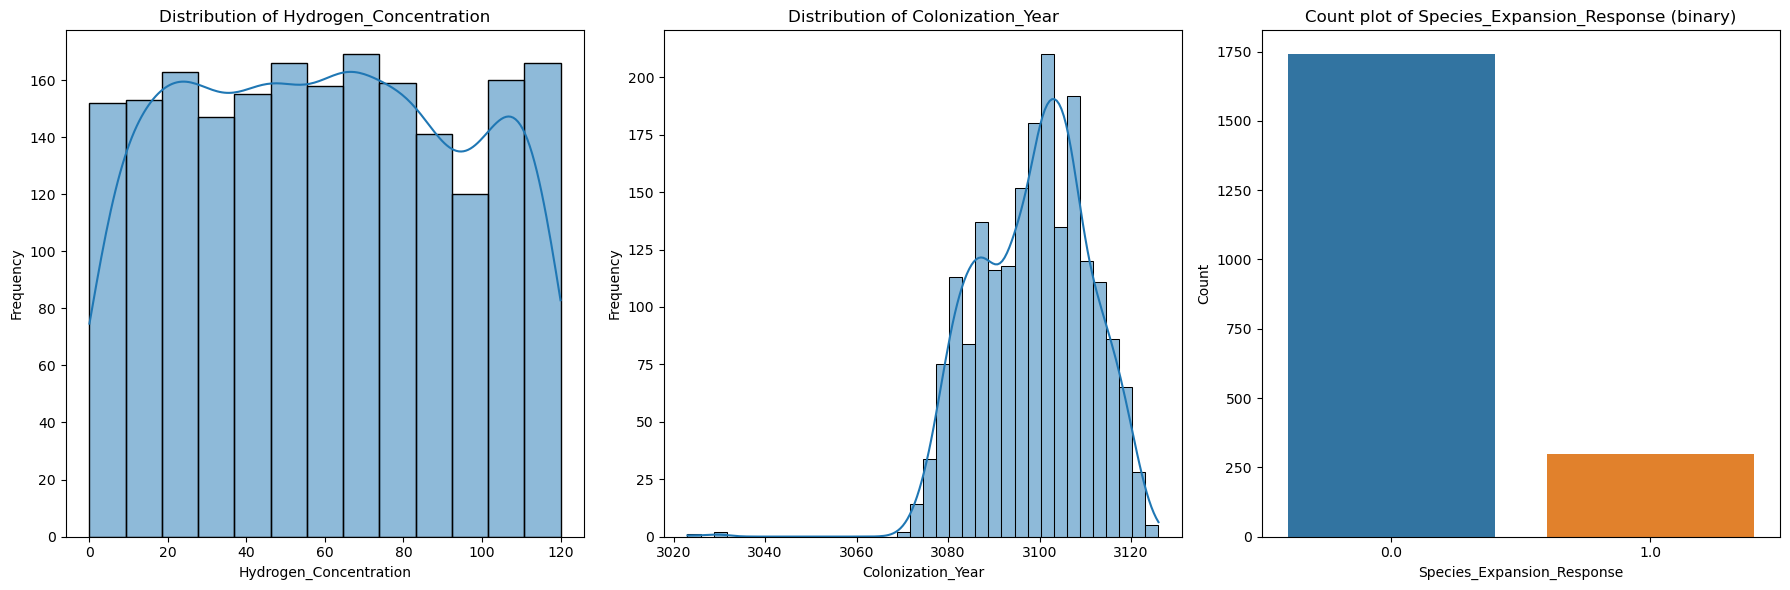

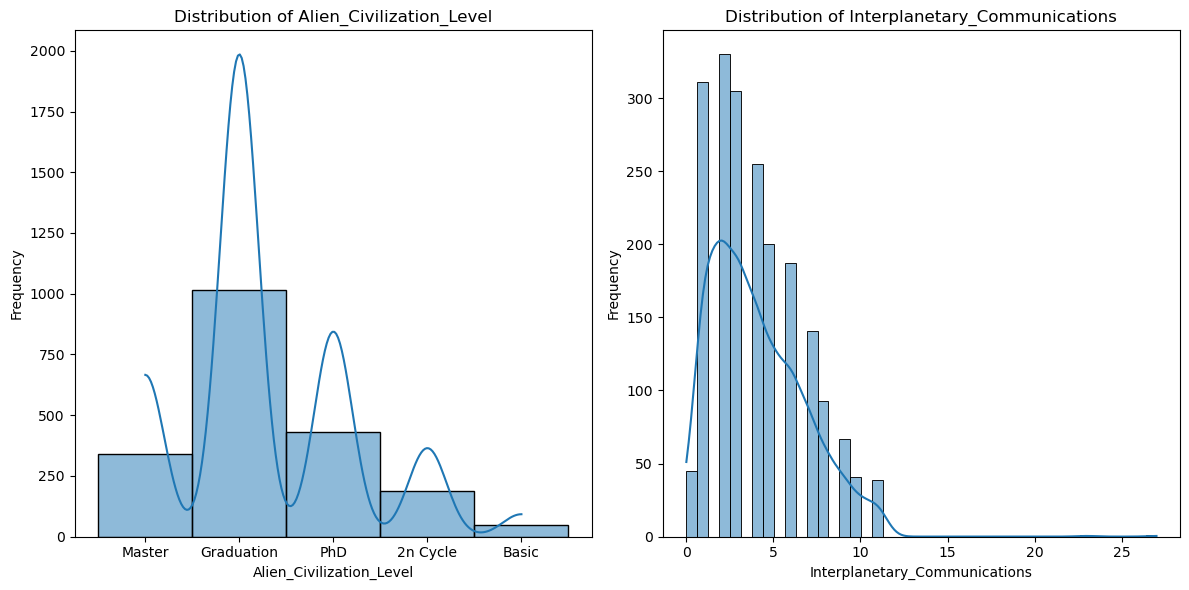

In [9]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = ['HeavyMetals_Concentration', 'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts',
    'Alien_Population_Count', 'CO2_Concentration', 'Dominant_Species_Social_Structure',
    'Hydrogen_Concentration', 'Colonization_Year', 'Species_Expansion_Response',
    'Alien_Civilization_Level', 'Interplanetary_Communications',
       ]
perform_graphical_analysis(plots_per_row, columns)


In [10]:
# Convert categorical columns to numerical if they are ordinal or use one-hot encoding if nominal
df_selected['Dominant_Species_Social_Structure'] = df_selected['Dominant_Species_Social_Structure'].astype('category').cat.codes
df_selected['Alien_Civilization_Level'] = df_selected['Alien_Civilization_Level'].astype('category').cat.codes
df_selected

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_24658/589733801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Dominant_Species_Social_Structure'] = df_selected['Dominant_Species_Social_Structure'].astype('category').cat.codes
/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_24658/589733801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Alien_Civilization_Level'] = df_selected['Alien_Civilization_Level'].astype('category').cat.codes


,HeavyMetals_Concentration,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,4.0,0.0,647.0,78285.0,10.0,3,98.55,3118.0,NaN,3,6.0
1,3.0,0.0,581.0,62772.0,10.0,4,66.36,3099.0,0.0,3,5.0
2,2.0,0.0,726.0,69016.0,5.0,3,25.23,3100.0,0.0,2,8.0
3,3.0,0.0,314.0,43795.0,NaN,5,44.59,3098.0,1.0,3,7.0
4,3.0,0.0,290.0,57957.0,8.0,5,90.67,3089.0,0.0,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2235,2.0,0.0,8.0,35924.0,2.0,5,71.60,3099.0,0.0,3,1.0
2236,3.0,0.0,56.0,47472.0,9.0,5,NaN,3096.0,0.0,4,2.0
2237,3.0,NaN,140.0,62499.0,5.0,5,62.52,3109.0,0.0,-1,3.0
2238,4.0,0.0,202.0,49767.0,2.0,4,47.32,3121.0,0.0,2,5.0


In [11]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

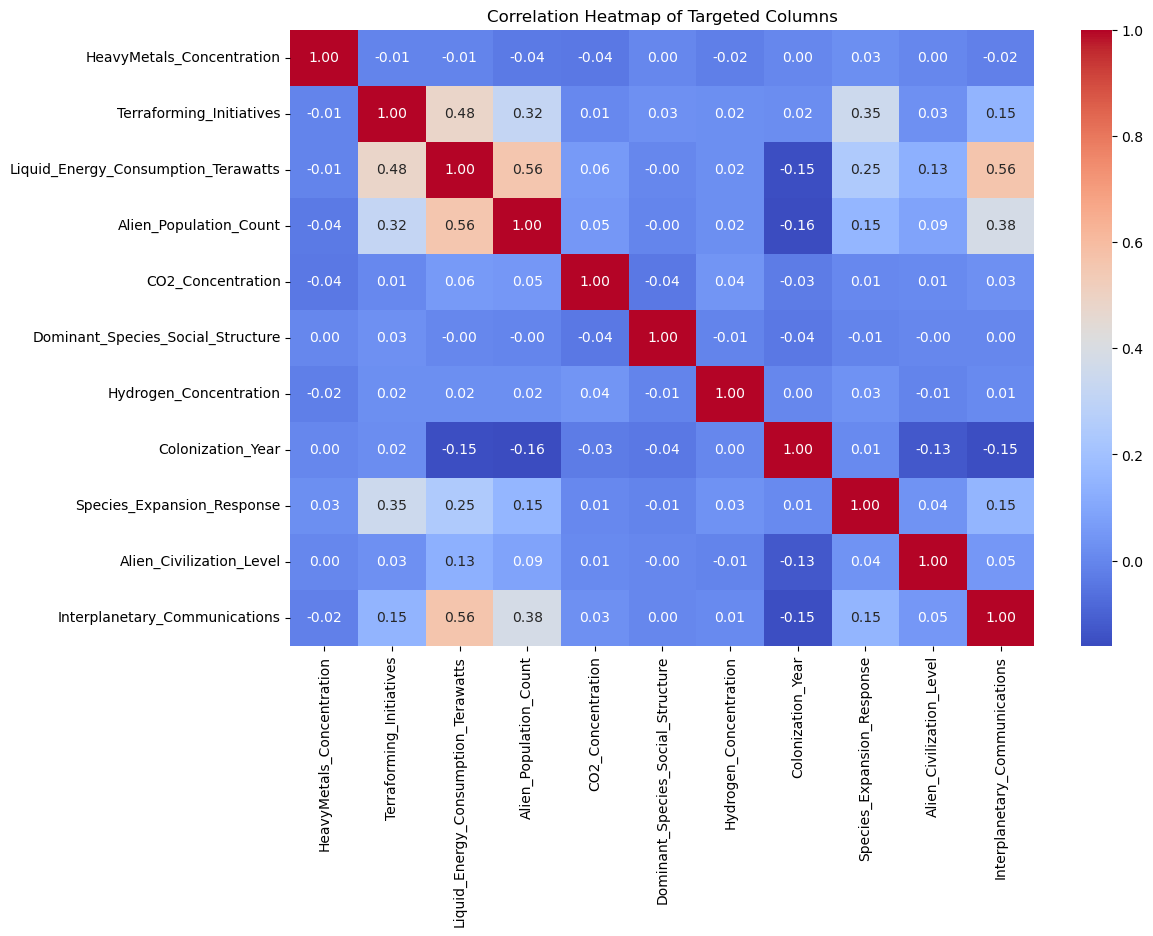

In [12]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title for better interpretation
plt.title("Correlation Heatmap of Targeted Columns")
plt.show()

In [13]:
def high_correlations(df, threshold=0.2):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=[float, int])
    correlation_matrix = numeric_df.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    # Convert result to DataFrame and sort
    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

    return correlation_df




In [14]:
# Call the correlation calculation function
correlation_df = high_correlations(df_selected)
correlation_df

,Variable 1,Variable 2,Correlation
0,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423
1,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047
2,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,0.478944
3,Alien_Population_Count,Interplanetary_Communications,0.383328
4,Terraforming_Initiatives,Species_Expansion_Response,0.348013
5,Terraforming_Initiatives,Alien_Population_Count,0.317841
6,Liquid_Energy_Consumption_Terawatts,Species_Expansion_Response,0.247303


In [15]:
"""#Example code to complete a bernoulli distributed variable
data = pd.DataFrame({
    'binary_feature': [1, 0, 1, np.nan, 0, 1, np.nan, 0, np.nan, 1]
})
# Step 1: Calculate the probability of success (P(X=1))
# Ignore NaNs when calculating the mean (probability of 1's in the observed data)
p_success = data['binary_feature'].mean()

# Step 2: Generate samples using the Bernoulli distribution
# Create samples only for the NaN values
nan_indices = data['binary_feature'].isna()

samples = bernoulli(p_success).rvs(size=nan_indices.sum())

# Step 3: Replace NaN values with the generated samples
data.loc[nan_indices, 'binary_feature'] = samples

print("Completed dataset:")
print(data)"""

'#Example code to complete a bernoulli distributed variable\ndata = pd.DataFrame({\n    \'binary_feature\': [1, 0, 1, np.nan, 0, 1, np.nan, 0, np.nan, 1]\n})\n# Step 1: Calculate the probability of success (P(X=1))\n# Ignore NaNs when calculating the mean (probability of 1\'s in the observed data)\np_success = data[\'binary_feature\'].mean()\n\n# Step 2: Generate samples using the Bernoulli distribution\n# Create samples only for the NaN values\nnan_indices = data[\'binary_feature\'].isna()\n\nsamples = bernoulli(p_success).rvs(size=nan_indices.sum())\n\n# Step 3: Replace NaN values with the generated samples\ndata.loc[nan_indices, \'binary_feature\'] = samples\n\nprint("Completed dataset:")\nprint(data)'

In [16]:
"""def complete_bernoulli_variable(column_name):
    data_column = df_in_progress[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df_in_progress[column_name] = data_column

# Apply the function to each column
complete_bernoulli_variable('Peace_Treaty_Accords')
complete_bernoulli_variable('Technological_Advancements')

print(df_in_progress.isna().sum()[:10])"""

"def complete_bernoulli_variable(column_name):\n    data_column = df_in_progress[column_name].copy()\n    p_success = data_column.mean()\n    \n    nan_indices = data_column.isna()\n    samples = bernoulli(p_success).rvs(size=nan_indices.sum())\n    \n    data_column.loc[nan_indices] = samples\n    \n    df_in_progress[column_name] = data_column\n\n# Apply the function to each column\ncomplete_bernoulli_variable('Peace_Treaty_Accords')\ncomplete_bernoulli_variable('Technological_Advancements')\n\nprint(df_in_progress.isna().sum()[:10])"

In [17]:
"""# plotting the updated variables
plots_per_row = 3
columns = ['Peace_Treaty_Accords', 'Technological_Advancements']
perform_graphical_analysis(plots_per_row, columns)"""

"# plotting the updated variables\nplots_per_row = 3\ncolumns = ['Peace_Treaty_Accords', 'Technological_Advancements']\nperform_graphical_analysis(plots_per_row, columns)"

In [18]:
# Check data types and non-null counts
df_selected.info()

# Get summary statistics
df_selected.describe(include='all')

# View the first few rows
#df_selected.head()

# Check for missing values
df_selected.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HeavyMetals_Concentration            2030 non-null   float64
 1   Terraforming_Initiatives             2010 non-null   float64
 2   Liquid_Energy_Consumption_Terawatts  1992 non-null   float64
 3   Alien_Population_Count               1999 non-null   float64
 4   CO2_Concentration                    2048 non-null   float64
 5   Dominant_Species_Social_Structure    2240 non-null   int8   
 6   Hydrogen_Concentration               2009 non-null   float64
 7   Colonization_Year                    1980 non-null   float64
 8   Species_Expansion_Response           2038 non-null   float64
 9   Alien_Civilization_Level             2240 non-null   int8   
 10  Interplanetary_Communications        2016 non-null   float64
dtypes: float64(9), int8(2)
memory 

HeavyMetals_Concentration              210
Terraforming_Initiatives               230
Liquid_Energy_Consumption_Terawatts    248
Alien_Population_Count                 241
CO2_Concentration                      192
Dominant_Species_Social_Structure        0
Hydrogen_Concentration                 231
Colonization_Year                      260
Species_Expansion_Response             202
Alien_Civilization_Level                 0
Interplanetary_Communications          224
dtype: int64

In [19]:
# Impute numeric columns with the mean or median
df_selected['HeavyMetals_Concentration'].fillna(df_selected['HeavyMetals_Concentration'].mean(), inplace=True)
df_selected['Terraforming_Initiatives'].fillna(df_selected['Terraforming_Initiatives'].median(), inplace=True)
df_selected['Liquid_Energy_Consumption_Terawatts'].interpolate(method='linear', inplace=True)

# Impute categorical columns with the mode or "Unknown"
df_selected['Dominant_Species_Social_Structure'].fillna(df_selected['Dominant_Species_Social_Structure'].mode()[0], inplace=True)
df_selected['Alien_Civilization_Level'].fillna("Unknown", inplace=True)

# Optional: Drop rows with excessive missing values if needed
#df.dropna(thresh=threshold, inplace=True)


/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_24658/3528835527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['HeavyMetals_Concentration'].fillna(df_selected['HeavyMetals_Concentration'].mean(), inplace=True)
/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_24658/3528835527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Terraforming_Initiatives'].fillna(df_selected['Terraforming_Initiatives'].median(), inplace=True)
/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_24658/3528835527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

HeavyMetals_Concentration                0
Terraforming_Initiatives                 0
Liquid_Energy_Consumption_Terawatts      0
Alien_Population_Count                 241
CO2_Concentration                      192
Dominant_Species_Social_Structure        0
Hydrogen_Concentration                 231
Colonization_Year                      260
Species_Expansion_Response             202
Alien_Civilization_Level                 0
Interplanetary_Communications          224
dtype: int64


<Figure size 1200x600 with 0 Axes>

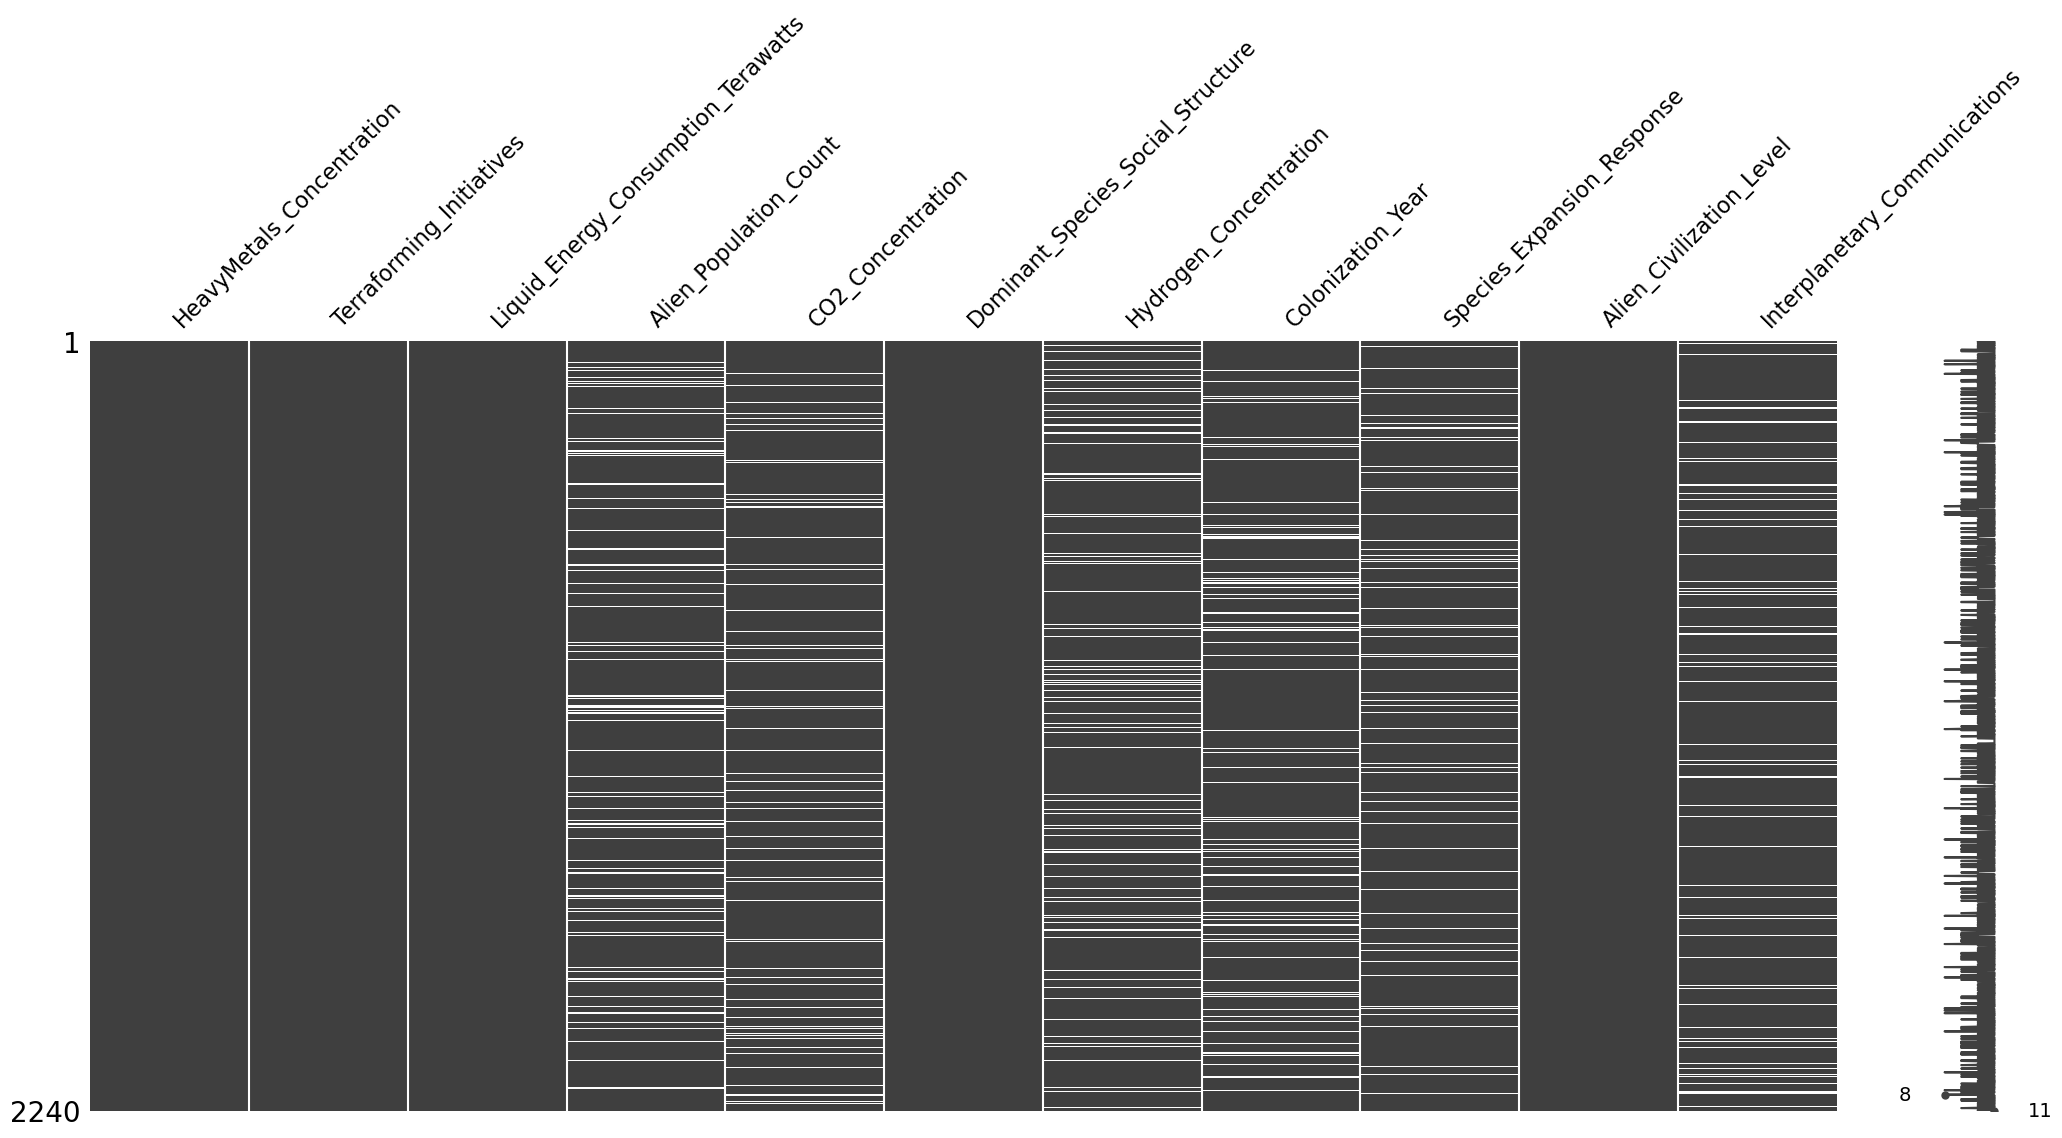

In [20]:
print(df_selected.isnull().sum())
plt.figure(figsize=(12, 6))
msno.matrix(df_selected)
plt.show()


In [21]:
from sklearn.impute import KNNImputer
import pandas as pd

# List of columns to apply KNN imputation to
columns_to_impute = [
    'Alien_Population_Count',
    'CO2_Concentration',
    'Hydrogen_Concentration',
    'Colonization_Year',
    'Species_Expansion_Response',
    'Interplanetary_Communications'
]

# Separate the columns to impute and the rest of the DataFrame
df_to_impute = df_selected[columns_to_impute]
df_rest = df_selected.drop(columns=columns_to_impute)

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation on the selected columns
df_imputed = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=columns_to_impute)

# Merge the imputed columns back with the rest of the DataFrame
df_selected_imputed = pd.concat([df_rest, df_imputed], axis=1)



HeavyMetals_Concentration              0
Terraforming_Initiatives               0
Liquid_Energy_Consumption_Terawatts    0
Dominant_Species_Social_Structure      0
Alien_Civilization_Level               0
Alien_Population_Count                 0
CO2_Concentration                      0
Hydrogen_Concentration                 0
Colonization_Year                      0
Species_Expansion_Response             0
Interplanetary_Communications          0
dtype: int64


<Figure size 1200x600 with 0 Axes>

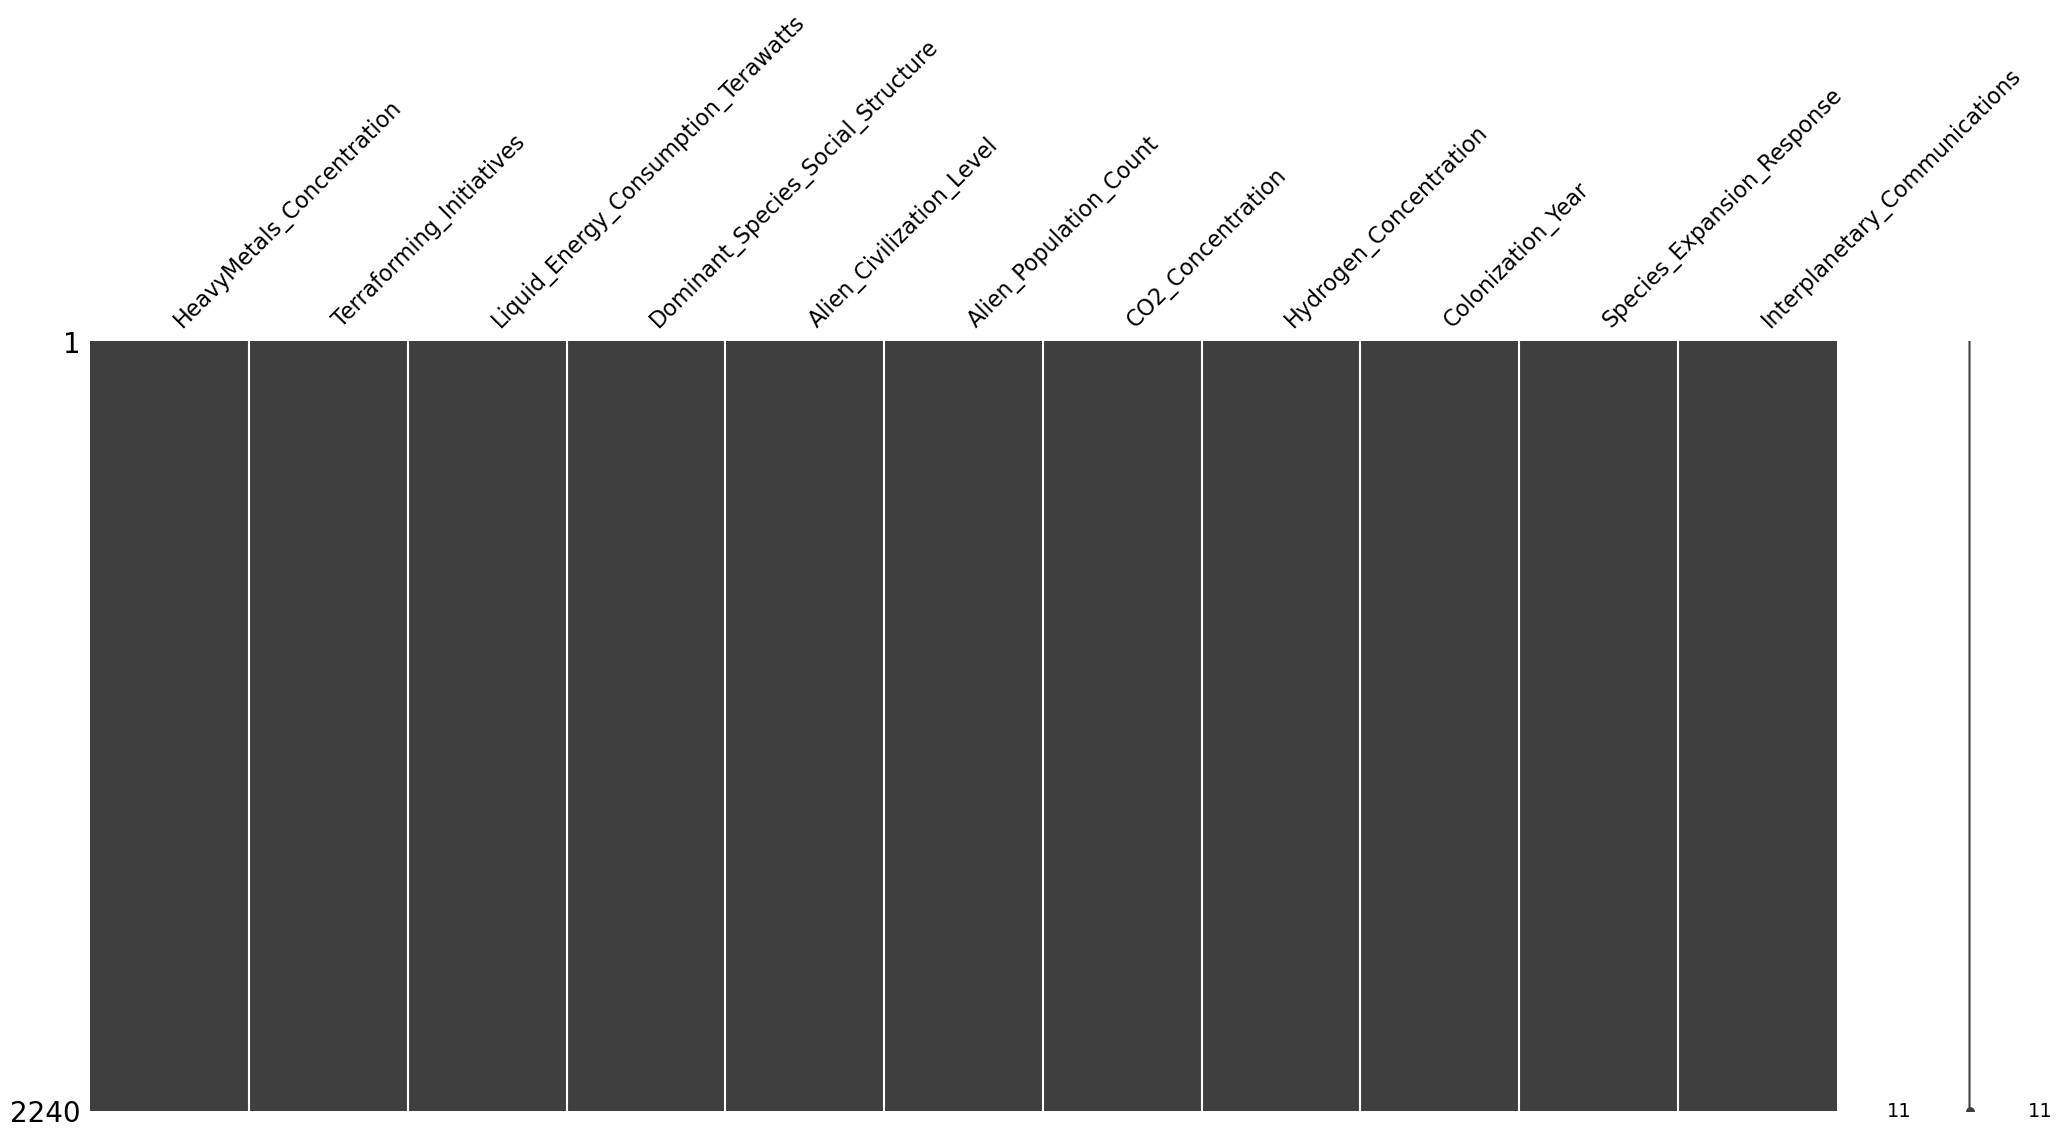

In [22]:
print(df_selected_imputed.isnull().sum())
plt.figure(figsize=(12, 6))
msno.matrix(df_selected_imputed)
plt.show()

In [23]:
# Function to quickly plot the demanded variables

def perform_graphical_analysis(plots_per_row, columns):

    for i in range(0, len(columns), plots_per_row):
        remaining_columns = len(columns) - i
        
        if remaining_columns == 2:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        elif remaining_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        else:
            fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
        
        for j, column in enumerate(columns[i:i+plots_per_row]):
            if remaining_columns == 1:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_selected_imputed[column], ax=ax)
                    ax.set_title(f'Count plot of {column} (binary)')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Count')
                else:
                    sns.histplot(df_selected_imputed[column], kde=True, ax=ax)
                    ax.set_title(f'Distribution of {column}')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Frequency')
            else:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_selected_imputed[column], ax=axes[j])
                    axes[j].set_title(f'Count plot of {column} (binary)')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Count')
                else:
                    sns.histplot(df_selected_imputed[column], kde=True, ax=axes[j])
                    axes[j].set_title(f'Distribution of {column}')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

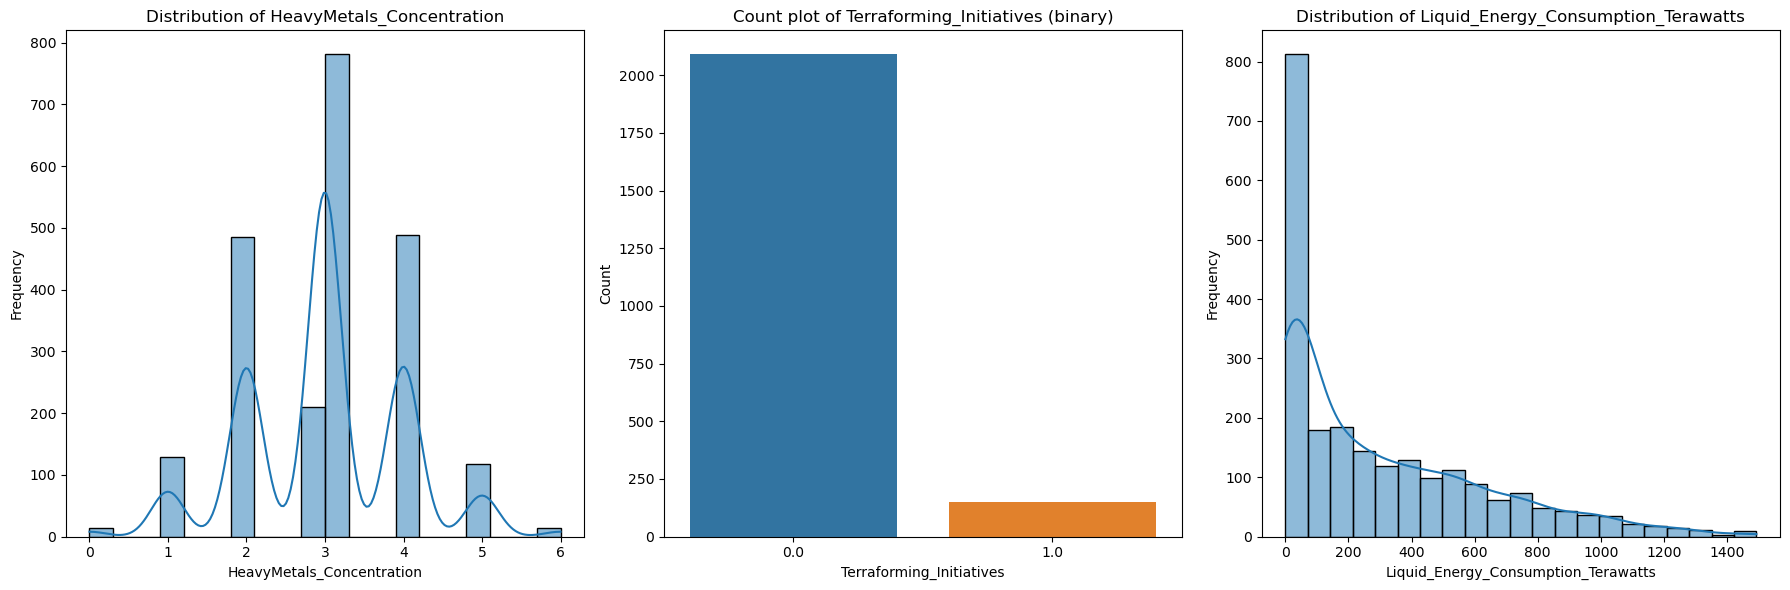

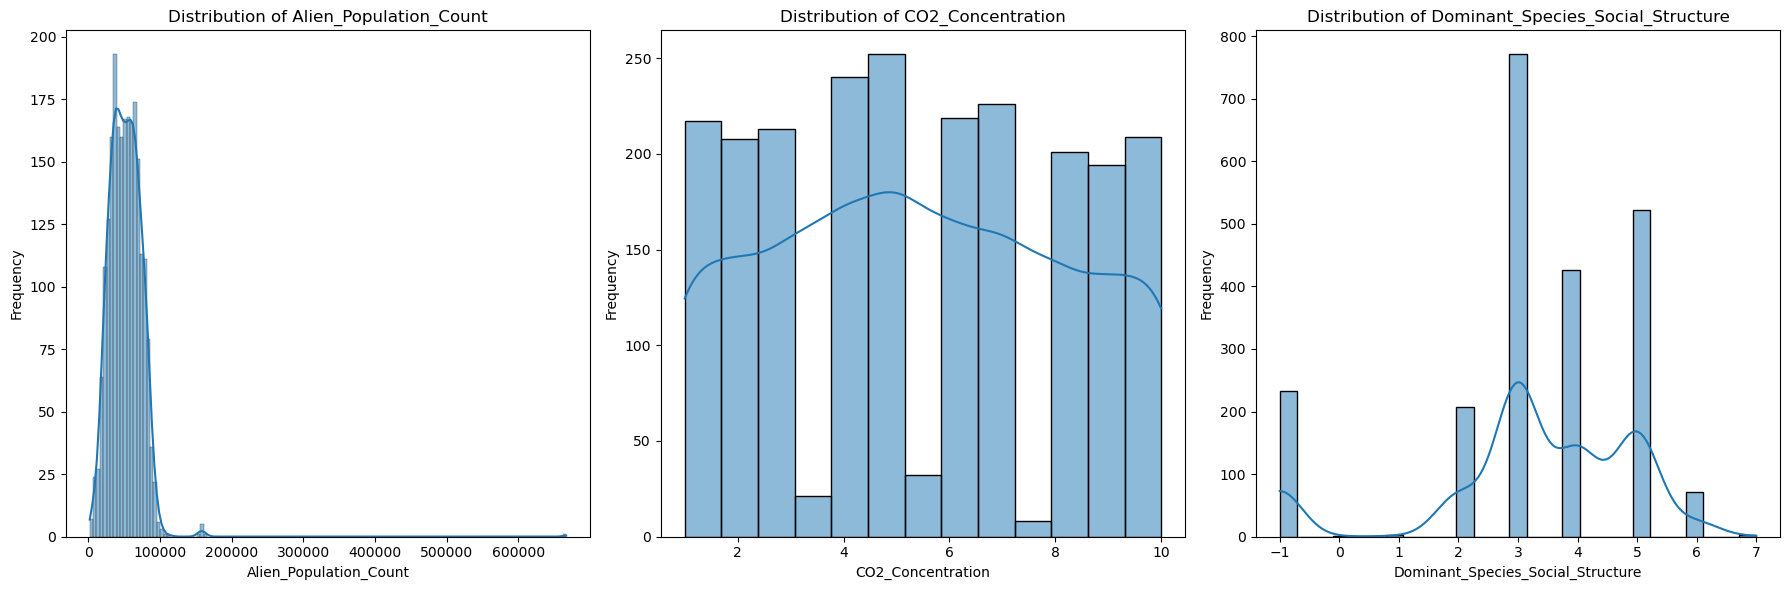

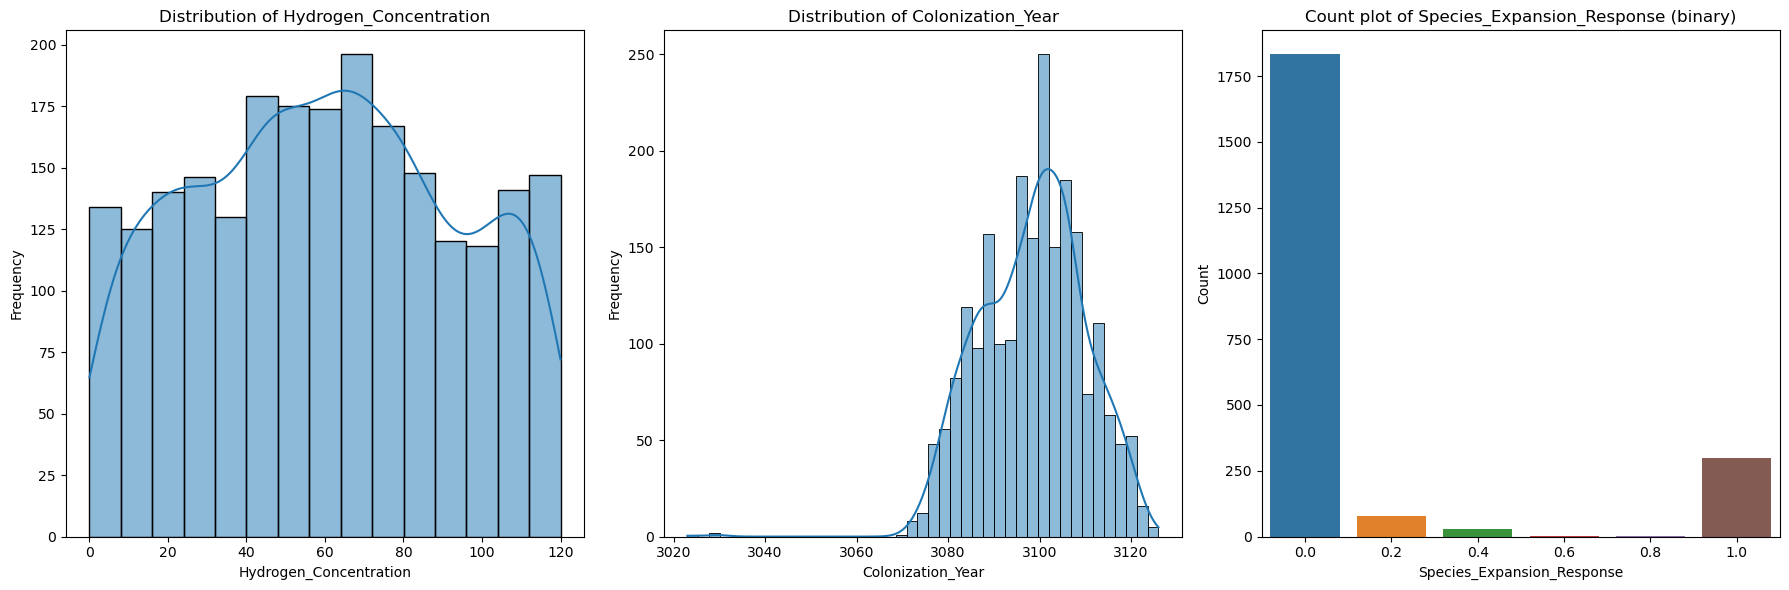

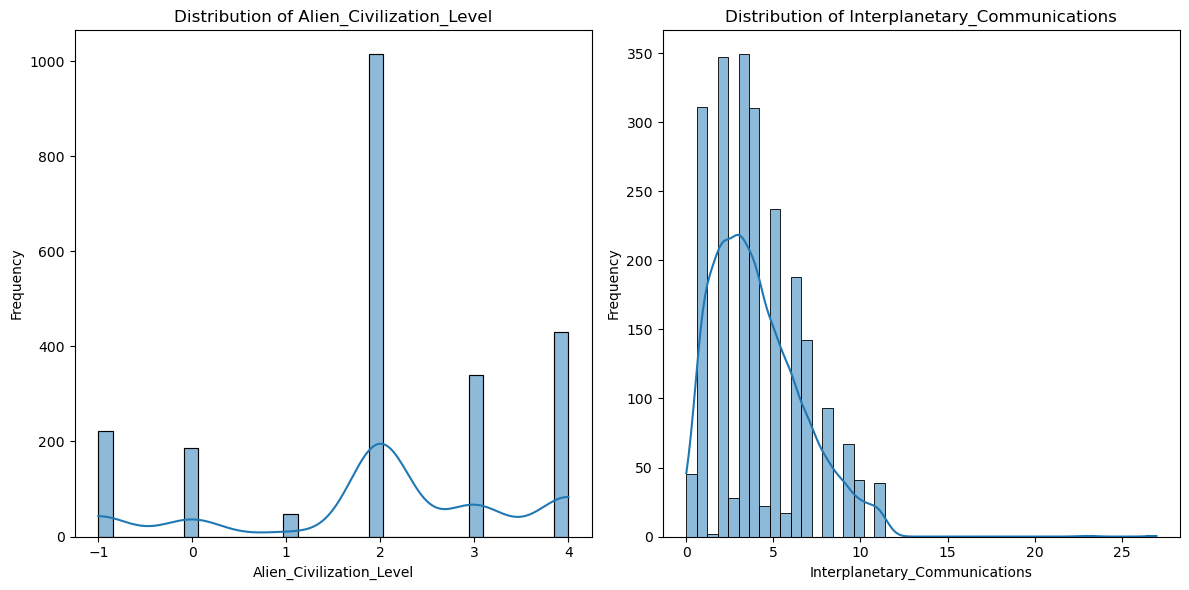

In [24]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = ['HeavyMetals_Concentration', 'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts',
    'Alien_Population_Count', 'CO2_Concentration', 'Dominant_Species_Social_Structure',
    'Hydrogen_Concentration', 'Colonization_Year', 'Species_Expansion_Response',
    'Alien_Civilization_Level', 'Interplanetary_Communications',
       ]
perform_graphical_analysis(plots_per_row, columns)

In [25]:
# Calculate the correlation matrix
correlation_matrix = df_selected_imputed.corr()

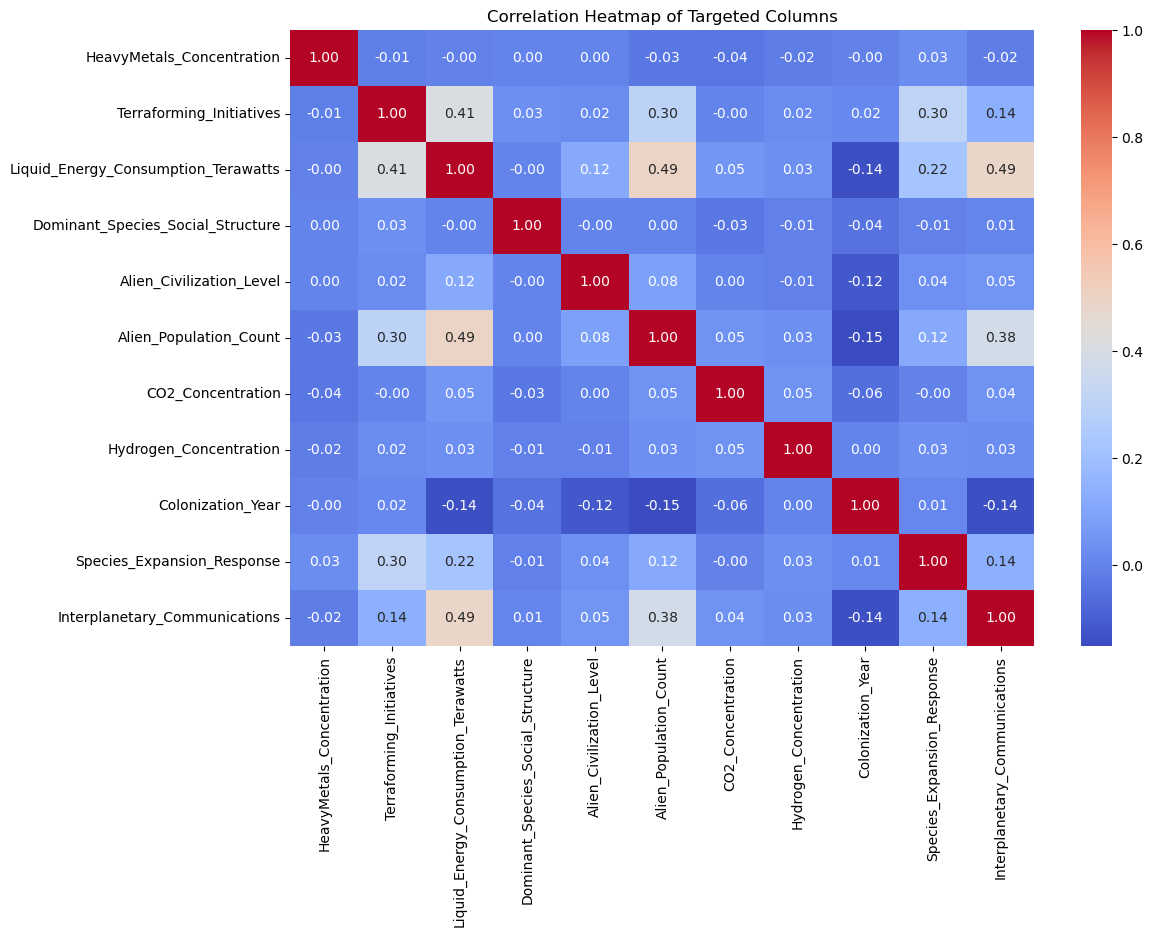

In [26]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title for better interpretation
plt.title("Correlation Heatmap of Targeted Columns")
plt.show()

In [27]:
#Calculate the correlations after completing the values
correlation_df2 = high_correlations(df_selected_imputed)
combined_df = pd.concat([correlation_df, correlation_df2], axis=1)
combined_df

,Variable 1,Variable 2,Correlation,Variable 1,Variable 2,Correlation
0,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.493531
1,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.487684
2,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,0.478944,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,0.410429
3,Alien_Population_Count,Interplanetary_Communications,0.383328,Alien_Population_Count,Interplanetary_Communications,0.377696
4,Terraforming_Initiatives,Species_Expansion_Response,0.348013,Terraforming_Initiatives,Species_Expansion_Response,0.304761
5,Terraforming_Initiatives,Alien_Population_Count,0.317841,Terraforming_Initiatives,Alien_Population_Count,0.298111
6,Liquid_Energy_Consumption_Terawatts,Species_Expansion_Response,0.247303,Liquid_Energy_Consumption_Terawatts,Species_Expansion_Response,0.218794
